In [7]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
folders = ['barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish', 'mauve_stinger_jellyfish', 'moon_jellyfish']
jelly_num = 0

folder = folders[jelly_num]

dataset_dir = f"C:/Users/user/SKT_Fly_AI/toy_project/jellyfish/{folder}"

In [4]:
img_height, img_width = (224, 224)
batch_size = 32

train_data_dir = f"C:/Users/user/SKT_Fly_AI/toy_project/jellyfish/Train_Test_Valid/train"
test_data_dir = f"C:/Users/user/SKT_Fly_AI/toy_project/jellyfish/Train_Test_Valid/test"
valid_data_dir = f"C:/Users/user/SKT_Fly_AI/toy_project/jellyfish/Train_Test_Valid/valid"

In [6]:
train_datagen  = ImageDataGenerator(rescale=1.0/255, rotation_range=1, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2)
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), class_mode='binary', batch_size=batch_size, shuffle=True)

valid_datagen = ImageDataGenerator(rescale=1.0/255)
valid_generator = valid_datagen.flow_from_directory(valid_data_dir, target_size=(img_height, img_width), class_mode='binary', batch_size=batch_size)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(img_height, img_width), class_mode='binary', batch_size=batch_size)

Found 900 images belonging to 6 classes.
Found 39 images belonging to 6 classes.
Found 40 images belonging to 6 classes.


In [9]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))
base_model.trainable = False

out = base_model.get_layer('block5_pool').output
x = GlobalAveragePooling2D()(out)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model = keras.Model(base_model.input, x)

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=valid_generator, epochs=10, verbose=1)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.1671 - loss: -4127.9980 - val_accuracy: 0.1282 - val_loss: -5109.0488
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.1688 - loss: -4761.4409 - val_accuracy: 0.1282 - val_loss: -5756.8545
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.1502 - loss: -5415.9849 - val_accuracy: 0.1282 - val_loss: -6456.8628
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.1736 - loss: -6155.5889 - val_accuracy: 0.1282 - val_loss: -7210.2422
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.1632 - loss: -6410.8149 - val_accuracy: 0.1282 - val_loss: -8024.0977
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.1644 - loss: -7573.5581 - val_accuracy: 0.1282 - val_loss: -8938.0410
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.1608 - loss: -8133.8340 - val_accuracy: 0.1282 - val_loss: -9883.5947
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 

In [12]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
test_acc

2/2 - 3s - 1s/step - accuracy: 0.1250 - loss: -1.2949e+04


0.125

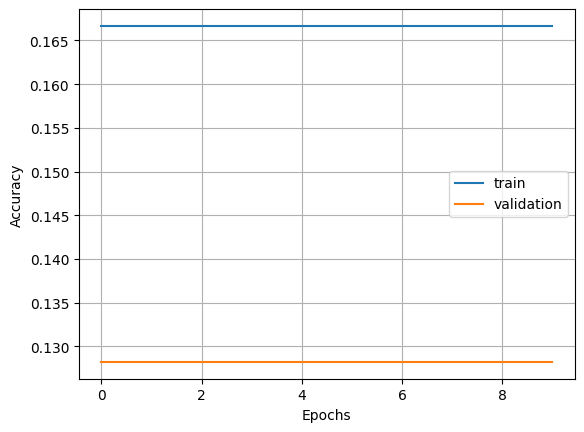

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])
plt.show()